# Soccer Prophet: Machine Learning Techniques for Accurate Match Predictions

### By: Roman Kovalchuk

## Part 1: Cleaning, Exploratory Data Analysis, and Data Wrangling

## Introduction

Soccer prophet is a machine learning algorithm that aims to forecast the results of soccer matches based on historical data based on past performance. With soccer's growing popularity across the globe, accurate predictions can be beneficial to betting companies, team management, and fans

Soccer Prophet will analyse match data including, past game metrics such as shots, shots on target, and yellow cards and apply these to machine learning algorithms to make accurate predictions

Let's import the libraries that we will be using.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's import the data:

In [182]:
#importing data
data = pd.read_csv("Euro-Football_2012-2023.csv")

Let's make sure that everything imported correctly by checking the first 5 rows:

In [90]:
data.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,dkkXCXT5QHMYiCvDBUCJQC,England,Premier League,E0,2012-2013,18/08/12,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,dAmonz9YM7qKwwvBsSoJo5,England,Premier League,E0,2012-2013,18/08/12,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,YwUhmYU4naswHgTHQgNDaW,England,Premier League,E0,2012-2013,18/08/12,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,iEk9YuADjHNVFduiEEHXSK,England,Premier League,E0,2012-2013,18/08/12,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,bLQW9sPVeiPZA5bJN2jpW8,England,Premier League,E0,2012-2013,18/08/12,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [91]:
#checking shape
print(f'The shape of the dataset is {data.shape[0]} rows and {data.shape[1]} columns')

The shape of the dataset is 231379 rows and 27 columns


Everything looks good, now let's check the columns:

In [92]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR'],
      dtype='object')


The columns can be unclear in the abbreviations so we can rename them to reduce confusion:

In [93]:
#renaming the columns to be more clear
data = data.rename(columns={'FTR': 'Result'})
data = data.rename(columns={'HTR': 'HalfTimeResult'})
data = data.rename(columns={'FTHG': 'HomeScore'})
data = data.rename(columns={'FTAG': 'AwayScore'})
data = data.rename(columns={'HTHG': 'HalfTimeHomeGoals'})
data = data.rename(columns={'HTAG': 'HalfTimeAwayGoals'})
data = data.rename(columns={'HS': 'HomeShots'})
data = data.rename(columns={'AS': 'AwayShots'})
data = data.rename(columns={'HST': 'HomeShotsOnTarget'})
data = data.rename(columns={'AST': 'AwayShotsOnTarget'})
data = data.rename(columns={'HF': 'HomeFouls'})
data = data.rename(columns={'AF': 'AwayFouls'})
data = data.rename(columns={'HF': 'HomeCorners'})
data = data.rename(columns={'AF': 'AwayCorners'})
data = data.rename(columns={'HC': 'HomeCorners'})
data = data.rename(columns={'AC': 'AwayCorners'})
data = data.rename(columns={'HY': 'HomeYellowCards'})
data = data.rename(columns={'AY': 'AwayYellowCards'})
data = data.rename(columns={'HR': 'HomeRedCards'})
data = data.rename(columns={'AR': 'AwayRedCards'})

In [94]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'HomeScore', 'AwayScore', 'Result',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeFouls',
       'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')


That's better. Now let's check the data types of our columns:

In [95]:
#checking data types
data.dtypes

id                    object
Country               object
League                object
Div                   object
Season                object
Date                  object
HomeTeam              object
AwayTeam              object
Referee               object
HomeScore            float64
AwayScore            float64
Result                object
HalfTimeHomeGoals    float64
HalfTimeAwayGoals    float64
HalfTimeResult        object
HomeShots            float64
AwayShots            float64
HomeShotsOnTarget    float64
AwayShotsOnTarget    float64
HomeFouls            float64
AwayFouls            float64
HomeCorners          float64
AwayCorners          float64
HomeYellowCards      float64
AwayYellowCards      float64
HomeRedCards         float64
AwayRedCards         float64
dtype: object

Most of our columns are floats, which will be useful for modeling. The `Result` and `HalfTimeResult` columns are object's which will need to be split into dummy or ternary columns for Home Win, Away Win or Draw. The date is an object, so we can convert it to `datetime` format:

In [96]:
#convert data to datetime
data["Date"] = pd.to_datetime(data["Date"])

/var/folders/n4/dk0kn6092fg4rgl4rgty93tr0000gn/T/ipykernel_1408/1728442683.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [97]:
#checking number of teams in each country
data.Country.value_counts()

England        37980
Spain          32856
Italy          30508
France         29624
Germany        23724
Scotland       16794
Belgium        13261
Turkey         12696
Netherlands    12186
Portugal       11721
Greece         10029
Name: Country, dtype: int64

In [98]:
#checking nulls
data.isnull().sum()

id                        0
Country                   0
League                    0
Div                     105
Season                    0
Date                    105
HomeTeam                105
AwayTeam                105
Referee              178290
HomeScore               107
AwayScore               107
Result                  107
HalfTimeHomeGoals       165
HalfTimeAwayGoals       165
HalfTimeResult          165
HomeShots            145750
AwayShots            145750
HomeShotsOnTarget    145750
AwayShotsOnTarget    145750
HomeFouls            147088
AwayFouls            147088
HomeCorners          145750
AwayCorners          145750
HomeYellowCards      145750
AwayYellowCards      145749
HomeRedCards         145749
AwayRedCards         145750
dtype: int64

In [99]:
data.AwayTeam.nunique()

474

In [100]:
data.HomeTeam.nunique()

473

In [101]:
data.League.value_counts()

Premier League       23881
Championship         23469
Segunda Division     18836
Serie B              16041
Le Championnat       14831
Division 2           14793
Serie A              14467
Primera Division     14020
Jupiler League       13261
Futbol Ligi 1        12696
Eredivisie           12186
Bundesliga 1         11862
Bundesliga 2         11862
Liga I               11721
Ethniki Katigoria    10029
Division 1            7424
Name: League, dtype: int64

In [102]:
#dropping unneeded leagues. they consist of leagues which are less popular/competitive as well as second divisions.
#we will be keeping English second division "Championship" as it is more competitive and contains plenty of data. 
#it also overlaps with (arguably) the top league in the world, "English Premier League", which is why the 
data = data.drop(data[data['League'] == 'Serie B'].index)
data = data.drop(data[data['League'] == 'Division 2'].index)
data = data.drop(data[data['League'] == 'Segunda Division'].index)
data = data.drop(data[data['League'] == 'Ethniki Katigoria'].index)
data = data.drop(data[data['League'] == 'Division 1'].index)
data = data.drop(data[data['League'] == 'Liga I'].index)
data = data.drop(data[data['League'] == 'Futbol Ligi 1'].index)
data = data.drop(data[data['League'] == 'Bundesliga 2'].index)
data = data.drop(data[data['League'] == 'Jupiler League'].index)
data = data.drop(data[data['League'] == 'Eredivisie'].index)
data = data.drop(data[data['Country'] == 'Scotland'].index)
data = data.drop(data[data['League'] == 'Championship'].index)

#dropping seasons which contain the majority of nulls
data1 = data[data['Season'] != '2022-2023']
data1 = data1[data1['Season'] != '2012-2013']


In [103]:
data1.Country.unique()

array(['England', 'Spain', 'Italy', 'Germany', 'France'], dtype=object)

In [104]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      5
Season                   0
Date                     5
HomeTeam                 5
AwayTeam                 5
Referee              12918
HomeScore                5
AwayScore                5
Result                   5
HalfTimeHomeGoals        7
HalfTimeAwayGoals        7
HalfTimeResult           7
HomeShots                6
AwayShots                6
HomeShotsOnTarget        6
AwayShotsOnTarget        6
HomeFouls                6
AwayFouls                6
HomeCorners              6
AwayCorners              6
HomeYellowCards          7
AwayYellowCards          6
HomeRedCards             6
AwayRedCards             6
dtype: int64

## Checking duplicates

In [105]:
data1.duplicated().sum()

0

## Dealing with Nulls

In [106]:
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
1140,K59rLz9hFEEb9qDGVoMKh6,England,Premier League,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19934,P4VMgAC7TXfGCdbH7L8ezr,Italy,Serie A,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20315,iVxkPFmAmfYDVw4nmFm79A,Italy,Serie A,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
34520,K2PRVLLenoj3Bz3b8jHReX,France,Le Championnat,NaN,2013-2014,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35281,7wbKrrsBQJZd2U4QnVAQqk,France,Le Championnat,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the `HalfTimeResult` null values, we now have 9 rows that containt nulls and most of them don't have any `HomeTeam` and `AwayTeam` match data which means they don't carry any meaningful information. We can safely drop these rows.

In [107]:
data1.dropna(subset=['HomeTeam'], inplace=True)

Now let's check the remaining null's by selecting 

In [108]:
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's fill in some of these null values:

The Bolton / Brentford game was forfeited as Bolton players were on strike over wages so Brentford were awarded a 1-0 win, therefore we can drop this match as it doesn't aid in building a match prediction model since there were no valuable metrics. https://www.bwfc.co.uk/news/2019/april/club-statement-bolton-wanderers-v-brentford/


In [109]:
#dropping bolton vs brentford
data1 = data1.drop(data1[data1['id'] == 'de6KmyaXUrp5tXKij847xx'].index)

Let's check the remaining matches:

In [110]:
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can fill in the yellow cards and referee value by looking up the match online:

In [111]:
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'HomeYellowCards'] = 6.0
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'Referee'] = "D Orsato"
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12912
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        2
HalfTimeAwayGoals        2
HalfTimeResult           2
HomeShots                1
AwayShots                1
HomeShotsOnTarget        1
AwayShotsOnTarget        1
HomeFouls                1
AwayFouls                1
HomeCorners              1
AwayCorners              1
HomeYellowCards          1
AwayYellowCards          1
HomeRedCards             1
AwayRedCards             1
dtype: int64

In [112]:
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can fill in the missing values for the Sassuolo - Pescara match the same way.

In [113]:
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeHomeGoals'] = 1.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeAwayGoals'] = 0.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeResult'] = "Home"
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'Referee'] = "P Tagliavento"

The Bastia vs Lyon match was abandoned at half-time when the Bastia fans threatened Lyon players, so we can drop it from out dataset: https://www.theguardian.com/football/2017/apr/16/lyon-players-bastia-supporters-invade-pitch

In [114]:
#dropping Bastia vs Lyon
data1 = data1.drop(data1[data1['id'] == 'iqAVaVrUuFEun4TDgA6EKj'].index)

In [115]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12910
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        0
HalfTimeAwayGoals        0
HalfTimeResult           0
HomeShots                0
AwayShots                0
HomeShotsOnTarget        0
AwayShotsOnTarget        0
HomeFouls                0
AwayFouls                0
HomeCorners              0
AwayCorners              0
HomeYellowCards          0
AwayYellowCards          0
HomeRedCards             0
AwayRedCards             0
dtype: int64

Great, we've taken care of the all the nulls in terms of match features. Our only nulls remain in the referee set. We will split the matches with `Referee` info into their own category and then delete the `Referee` column from our main dataset. We will also export the Referee dataset as we will be using it to make a dashboard later on.

In [116]:
#checking referee nulls
referees_data = data1[data1['Referee'].notnull()]
referees_data.isnull().sum()

id                   0
Country              0
League               0
Div                  0
Season               0
Date                 0
HomeTeam             0
AwayTeam             0
Referee              0
HomeScore            0
AwayScore            0
Result               0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeFouls            0
AwayFouls            0
HomeCorners          0
AwayCorners          0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [117]:
#dropping referees from main
data1 = data1.drop('Referee', axis=1)
#checking nulls
data1.isnull().sum()

id                   0
Country              0
League               0
Div                  0
Season               0
Date                 0
HomeTeam             0
AwayTeam             0
HomeScore            0
AwayScore            0
Result               0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeFouls            0
AwayFouls            0
HomeCorners          0
AwayCorners          0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [118]:
#saving Referees data
referees_data.to_csv('Euro_Football_Referees.csv', index=False)

Null's have been sorted, now let's look at `Leagues`

### Cleaning up `Leagues`

In [119]:
data1['League'].value_counts()

Premier League      3420
Primera Division    3420
Serie A             3420
Le Championnat      3318
Bundesliga 1        2754
Name: League, dtype: int64

In [120]:
data1['League'].value_counts() / len(data1) * 100

Premier League      20.940485
Primera Division    20.940485
Serie A             20.940485
Le Championnat      20.315944
Bundesliga 1        16.862601
Name: League, dtype: float64

In [121]:
print(f'The shape of the dataset is {data1.shape[0]} rows and {data1.shape[1]} columns')

The shape of the dataset is 16332 rows and 26 columns


In [122]:
data1['League'].value_counts() / len(data1) * 100

Premier League      20.940485
Primera Division    20.940485
Serie A             20.940485
Le Championnat      20.315944
Bundesliga 1        16.862601
Name: League, dtype: float64

Now that we've finished cleaning the data, let's make a copy of it and begin Exploratory Data Analysis

In [123]:
#making a copy of the clean data for exploration
clean_data = data1.copy()

# Exploratory Data Analysis

In [124]:
clean_data.describe()

,HomeScore,AwayScore,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000
mean,1.539309,1.210201,0.677504,0.532880,13.524920,11.059393,4.841661,3.969569,12.779451,13.081374,5.512430,4.471528,1.913728,2.142297,0.090926,0.116765
std,1.309676,1.171200,0.833019,0.740434,5.201263,4.613255,2.620982,2.333027,4.150892,4.253774,2.947134,2.612361,1.344505,1.377836,0.303872,0.341300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,15.000000,16.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,10.000000,9.000000,6.000000,6.000000,46.000000,35.000000,18.000000,20.000000,33.000000,32.000000,22.000000,19.000000,8.000000,9.000000,3.000000,3.000000


## Visualizing numerical variables

Now let's take a look at the numerical variables in our dataset:

In [125]:
clean_data.select_dtypes("number").columns

Index(['HomeScore', 'AwayScore', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
       'HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget',
       'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
       'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [126]:
#changing the style of the plot
plt.style.use("ggplot")
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"

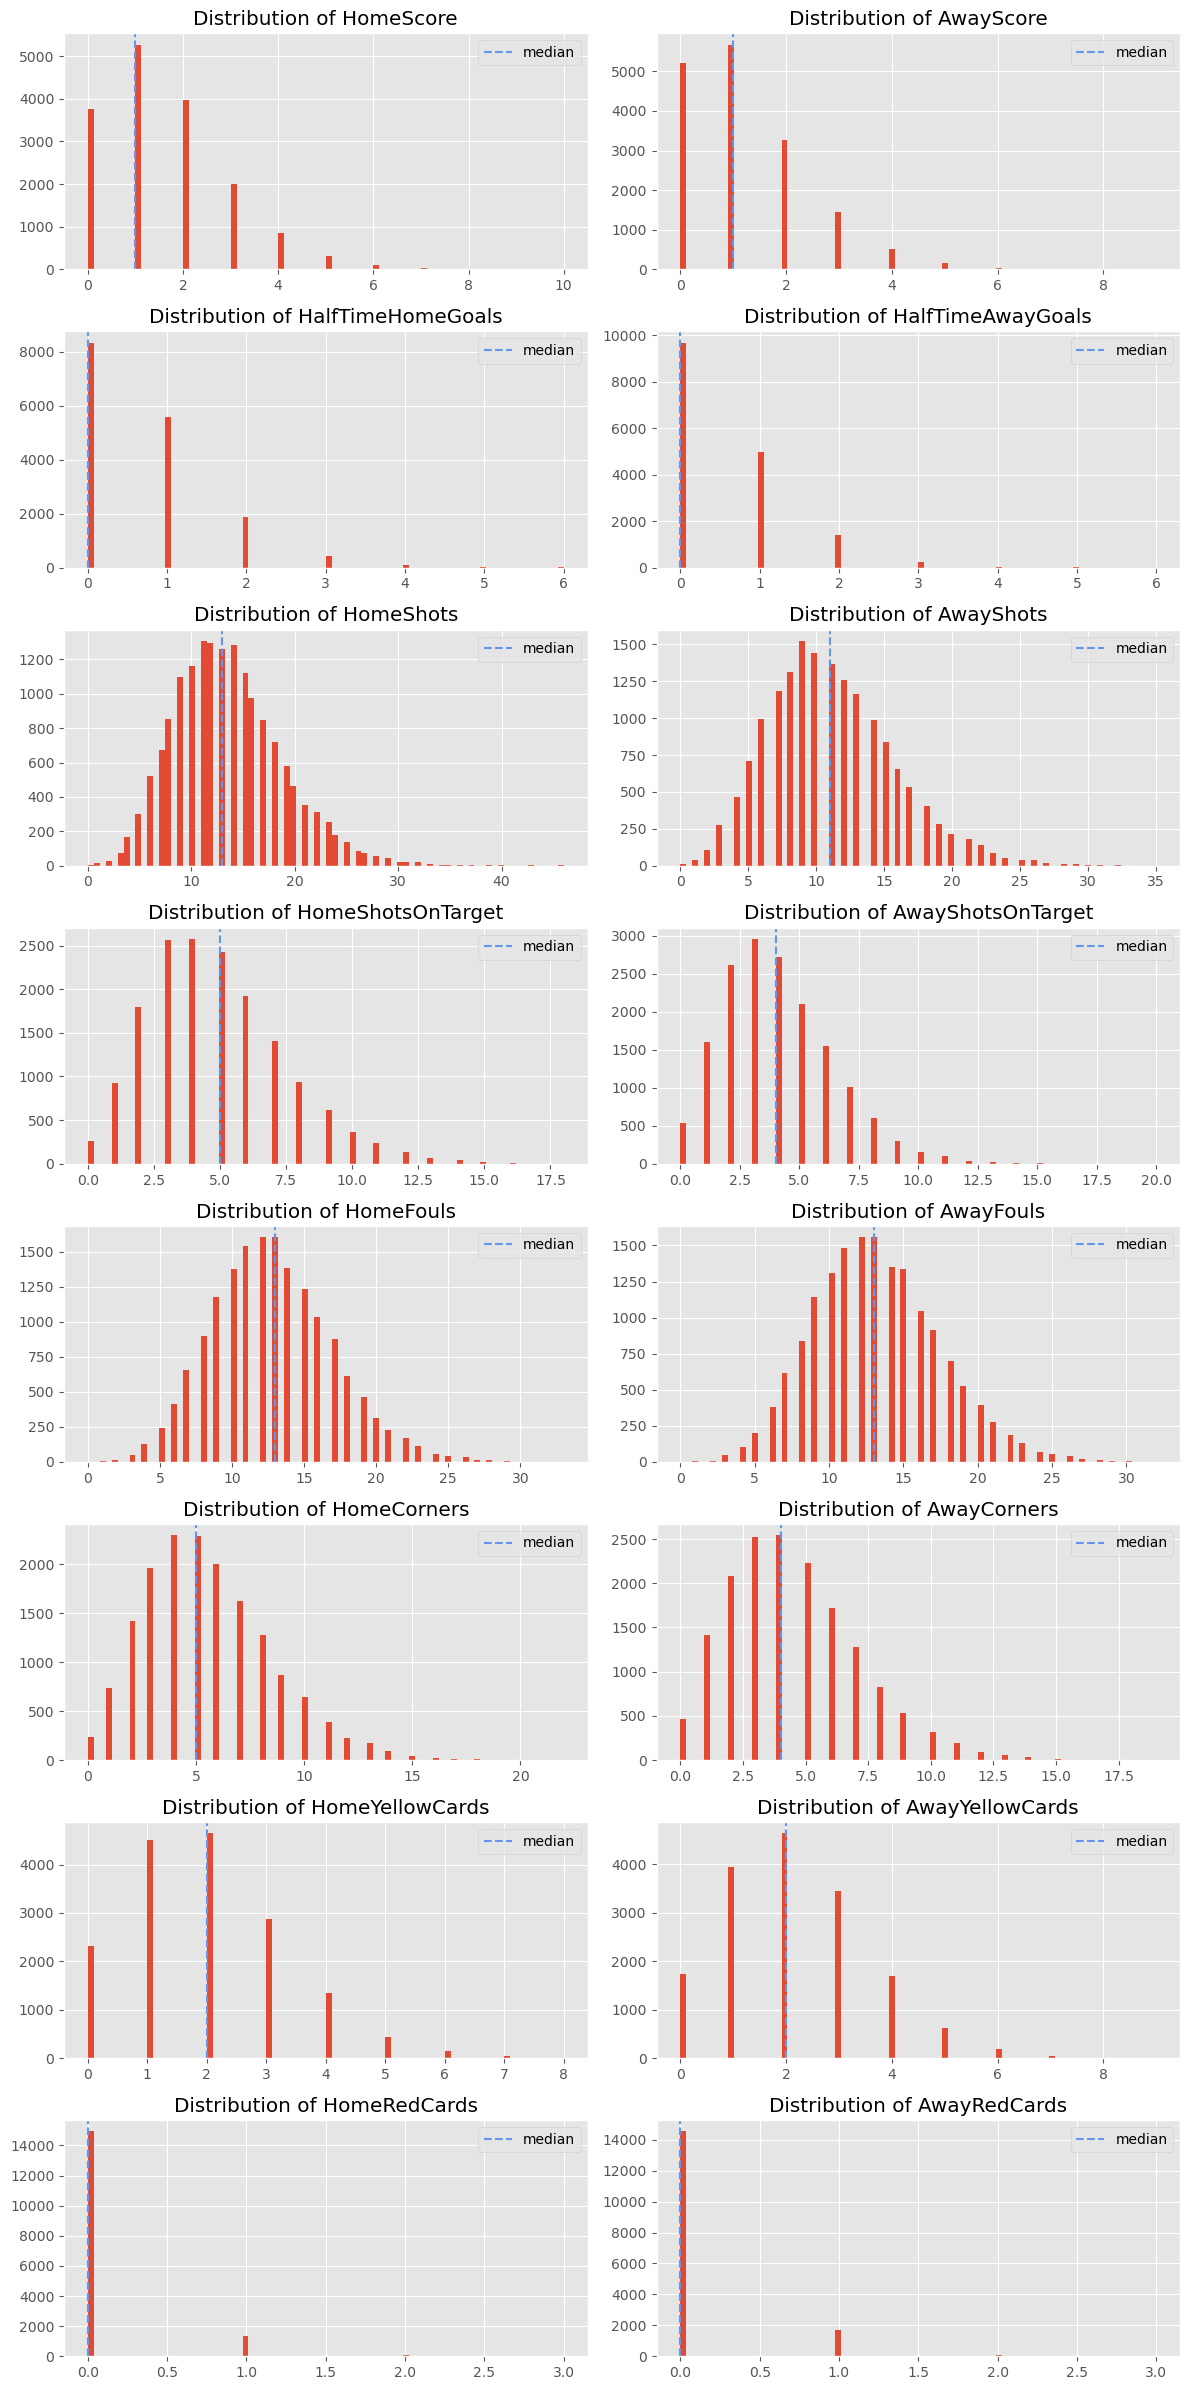

In [127]:
# Create a figure with 8 rows and 2 columns
fig, axs = plt.subplots(8, 2, figsize=(12, 24))

# Plot numeric columns in each subplot
for i, column in enumerate(clean_data.select_dtypes("number").columns):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(clean_data[column], bins=80)
    axs[row, col].axvline(clean_data[column].median(), 0, 1000, label="median", color="cornflowerblue", linestyle="--")
    axs[row, col].set_title(f"Distribution of {column}")
    axs[row, col].legend()

fig.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

From the graphs above, we see a clear advantage to being the home team. While the median goals scored are level, Home Teams are more likely to score 2 or more goals at Full and Half Time. Home Teams also produce more shots and earn more corner kicks. When it comes to fouls, the distribution is quite normal, with both teams having reason to show aggression. Home teams want to please the fans and assert dominance, while away teams draw fouls in order to break down their opponents attacks. However, the Away Team does seem to have a higher frequency of fouls after the 15 foul point Away Teams also earn more Yellow and Red Cards. They are less likely to end a game at full time with 0 yellow cards. Away teams are also more likely to earn one red card.

## Visualizing Categoric Variables

Now, let's visualize our categorical variables. 

In [128]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam',
       'Result', 'HalfTimeResult'],
      dtype='object')


## Visualizing `Result`

First, let's see the distribution of the `Result`'s. As seen with the numerical variables, we expect the Home Team to have a higher proportion of wins at the end of the match

In [129]:
# Filter the dataset to include only games where the home team won
home_win_df = data1[data1["Result"] == "H"]

# Calculate the proportion of games where the home team won
home_win_prop = len(home_win_df) / len(data1)

print("Proportion of games where the home team won: {:.2f}".format(home_win_prop))

Proportion of games where the home team won: 0.45


First let's look at the proportions of winning teams after 90 minutes and compare them to matches when the team is leading at half:

<div>
<img src="https://i.ibb.co/G5qjYb6/Proportions-of-winning-teams-after-90-minutes.png" width="800"/>
</div>

The home team wins 45% of the time to the away team's 30%, while 25% of matches end in a draw.

<div><img src="https://i.ibb.co/ZH6xvFy/Half-Time-vs-Full-Time-results-of-winning-teams.png" width="800"/></div>

Even when losing at half time, the home team is still able to win 10% of the time compared to the away team at 71%. On the other hand, when winning at half time, the home team is able to win a comfortable 79% of the time while the away team is able to come back and win 6%. Even during a half time draw, the home team is able to win 37% of the time, higher than the chance of a game finishing in a draw at 36%. The away team only wins 26% of times when tied at half.

Let's take a look the most common teams in each league. We can group the data by `Home Team` since each team plays an even amount of home and away matches each season:

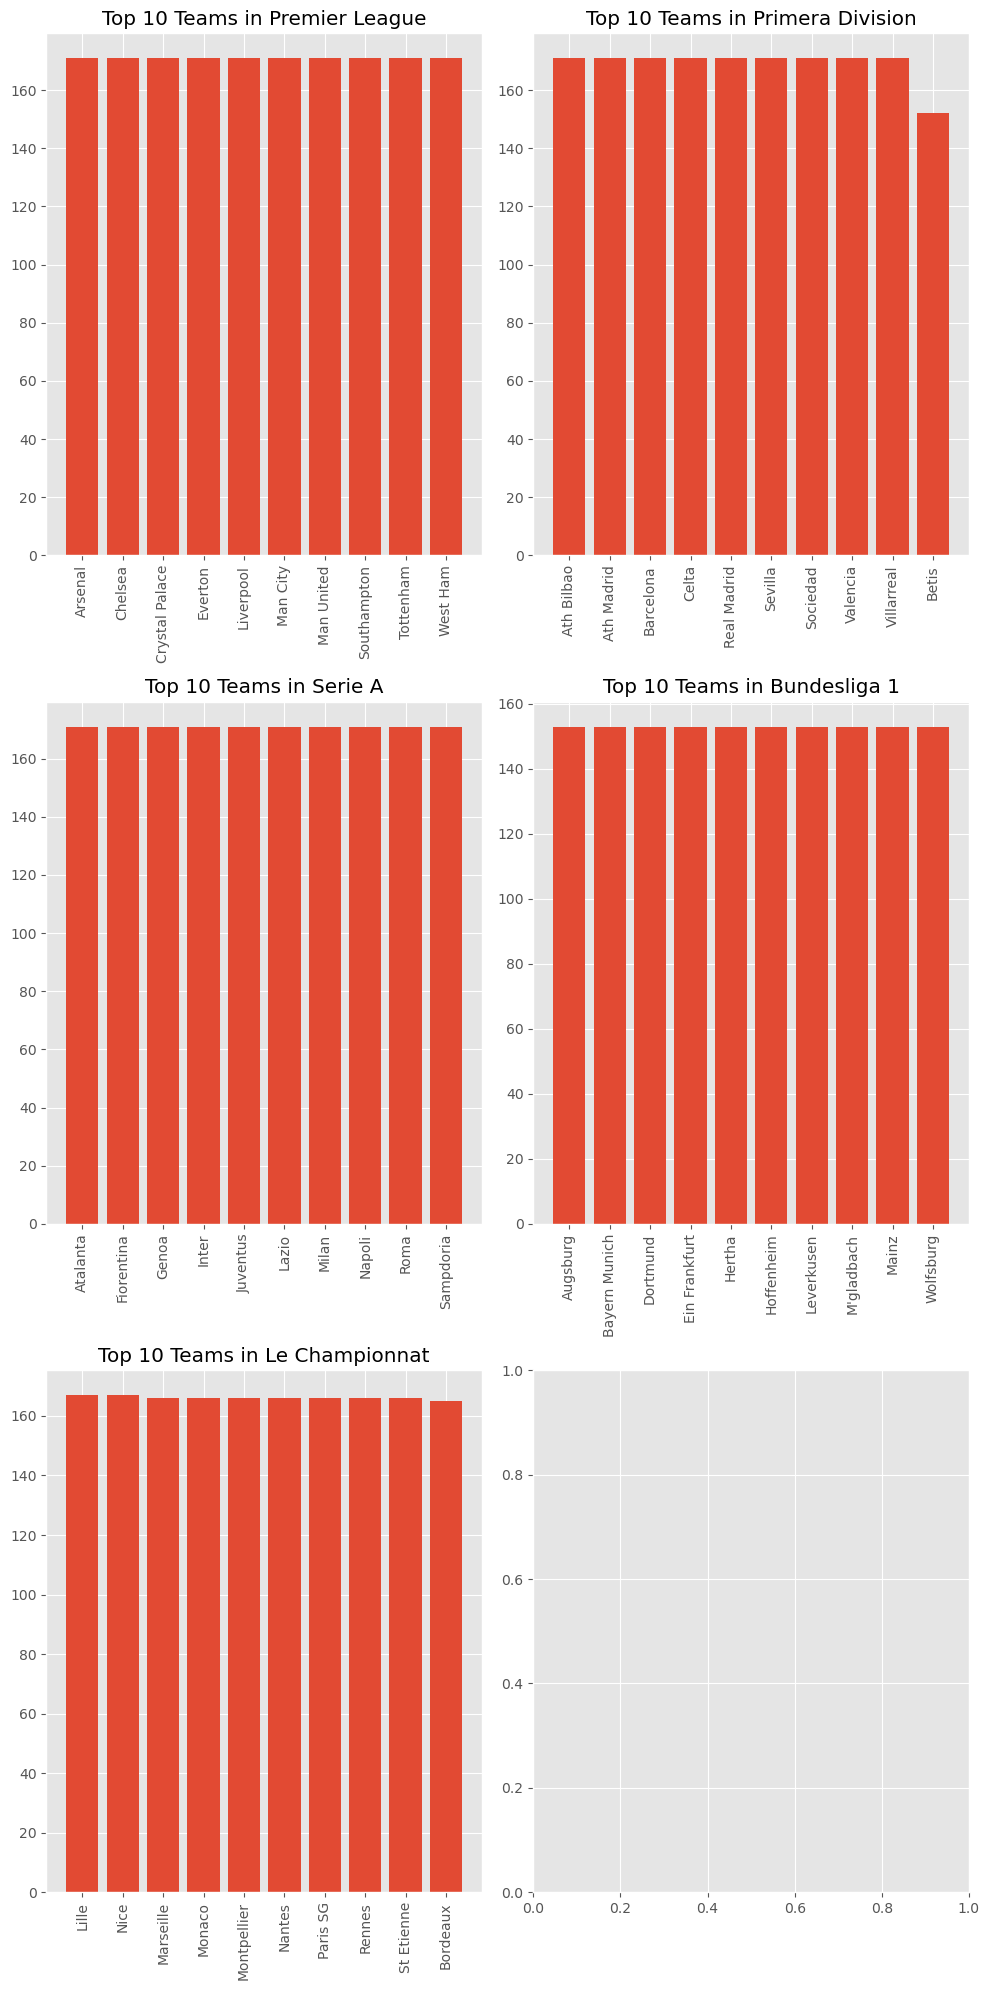

In [130]:
# Group data by league and count the number of occurrences of each team
league_counts = clean_data.groupby('League')['HomeTeam'].value_counts()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the top 10 teams
for i, league in enumerate(clean_data['League'].unique()):
    top_teams = league_counts[league].nlargest(10)
    axs[i//2, i%2].bar(top_teams.index, top_teams.values)
    axs[i//2, i%2].set_title(f'Top 10 Teams in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)



# Adjusting
plt.tight_layout()
plt.show()


As expected, the majority of the teams in each league are represented over 160 times.

Now let's take a look at which team's have won the most games when playing at home:

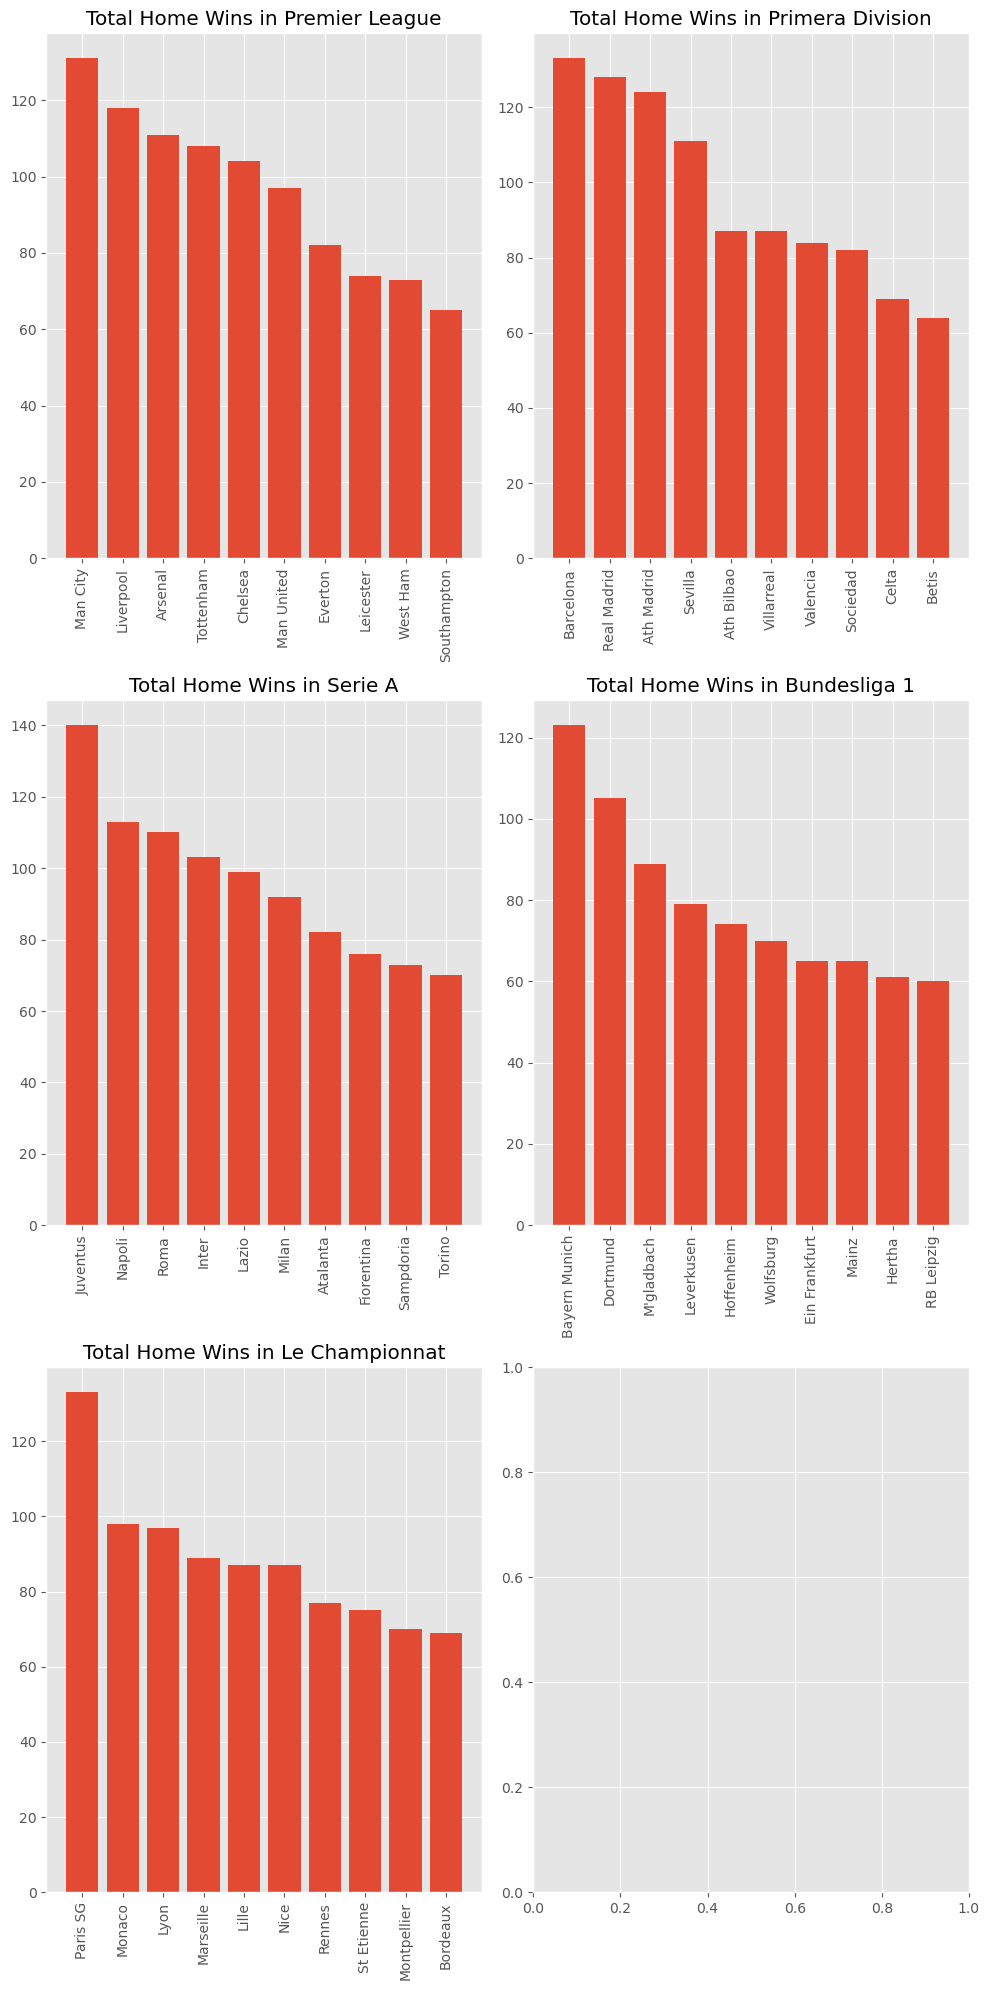

In [131]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'H'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Home Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

The most successful Home Team in the dataset seems to be Juventus with 140 wins at home, while the other top teams hover around the 130 mark. In England, Manchester City is the most successful home team, in Spain it's Barcelona, Germany it's Bayern Munich, and in France it's Paris St. Germain. 

Which team's have won the most playing away:

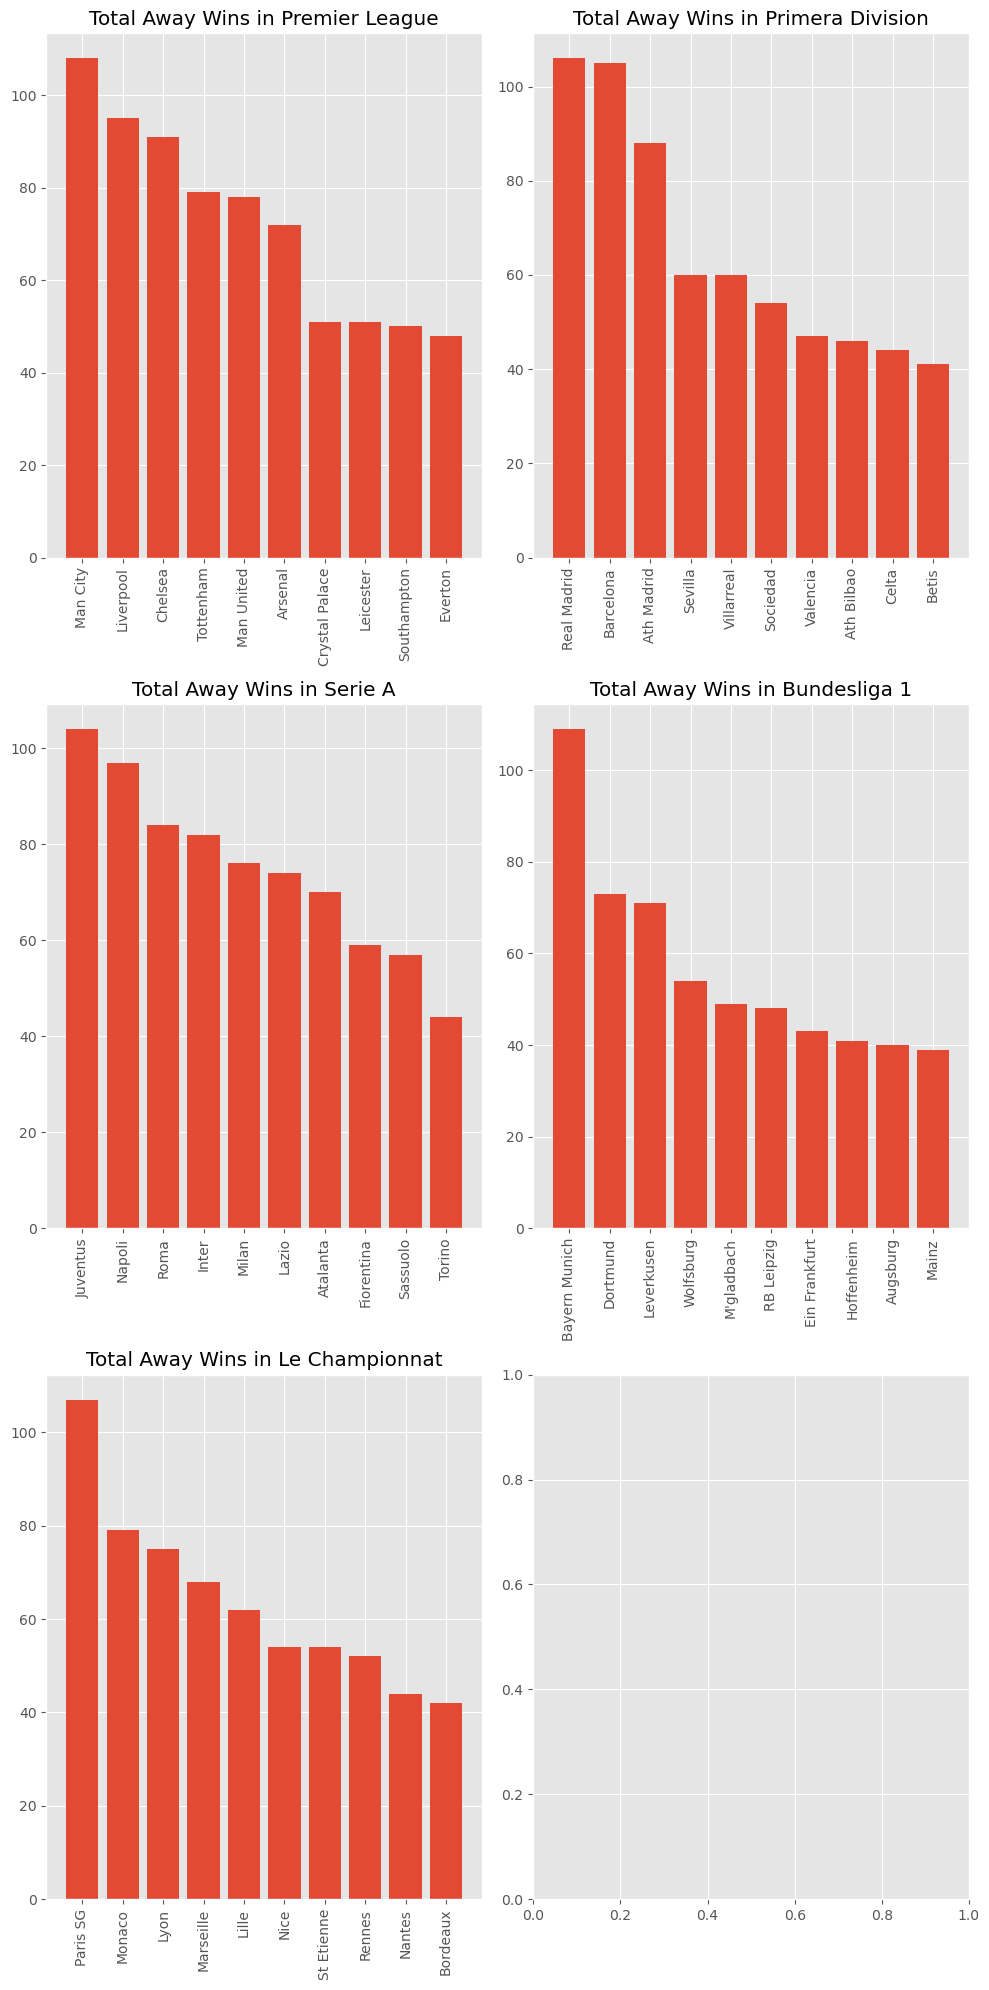

In [132]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'A'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Away Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

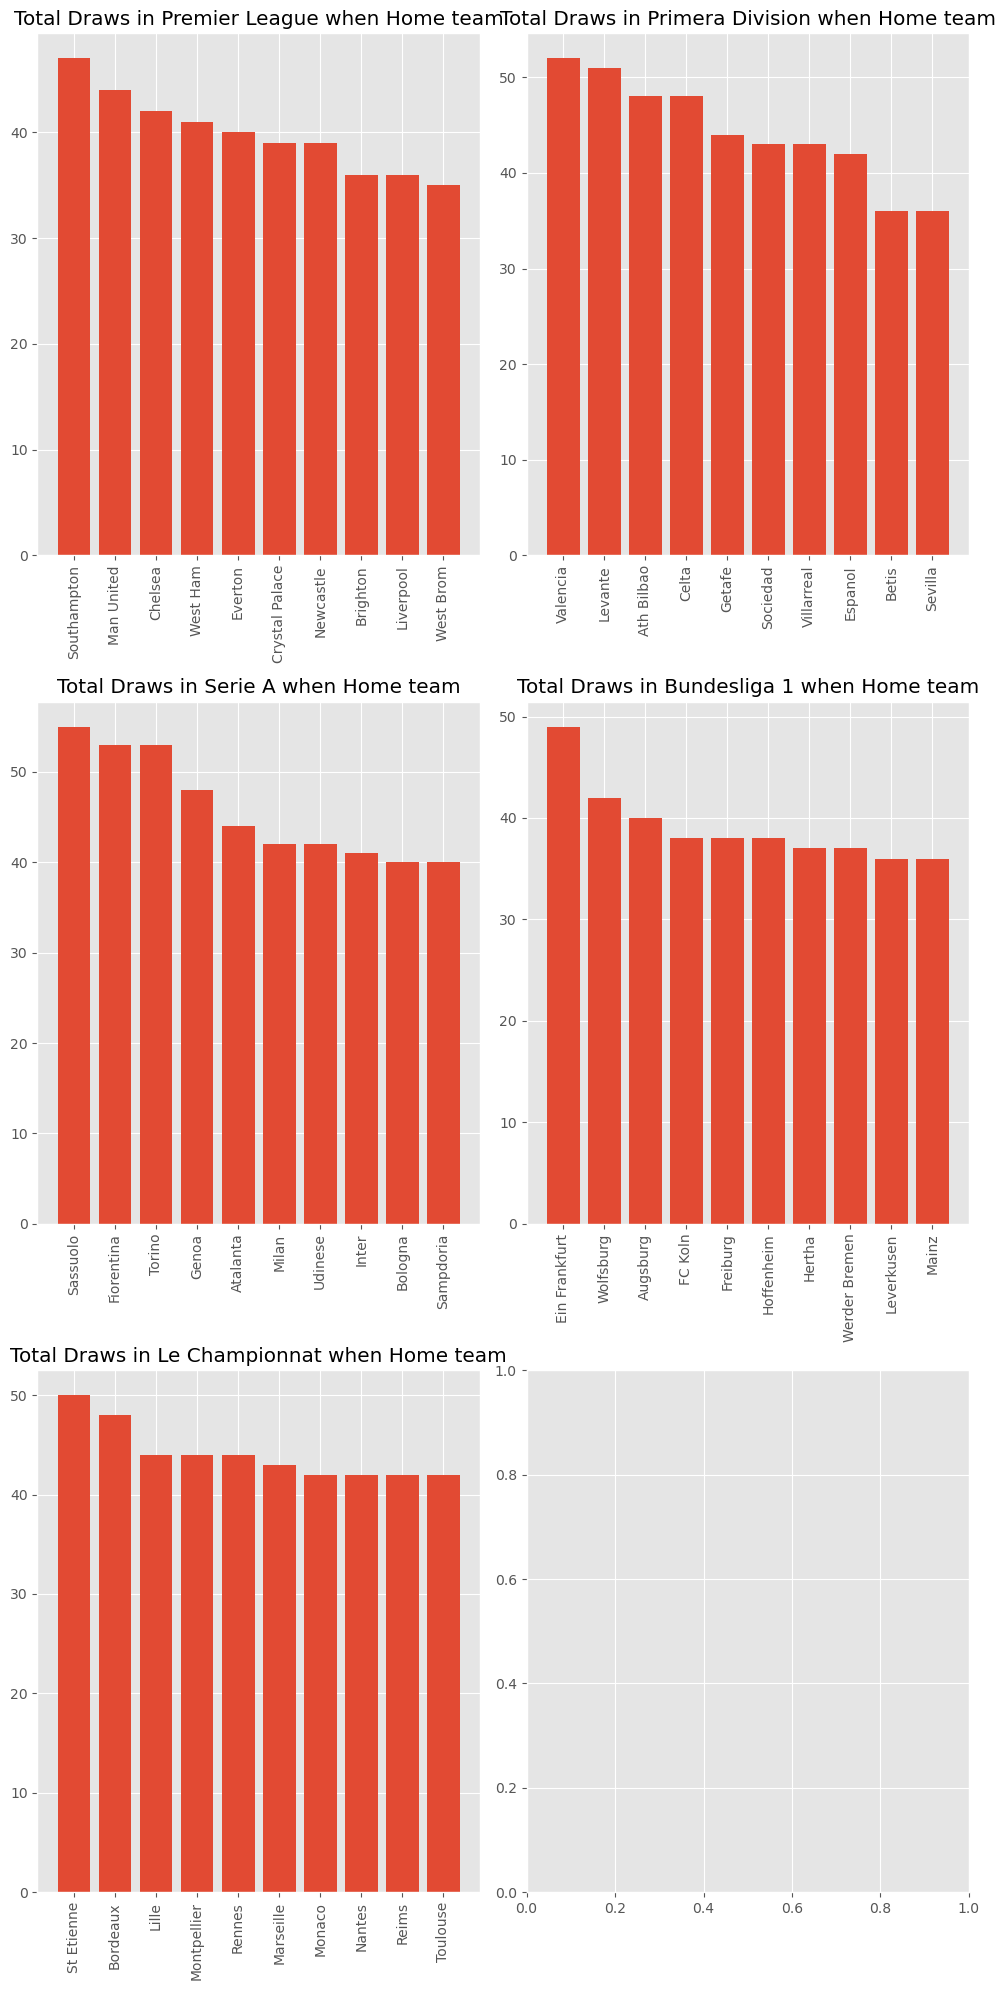

In [133]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'D'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Draws in {league} when Home team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

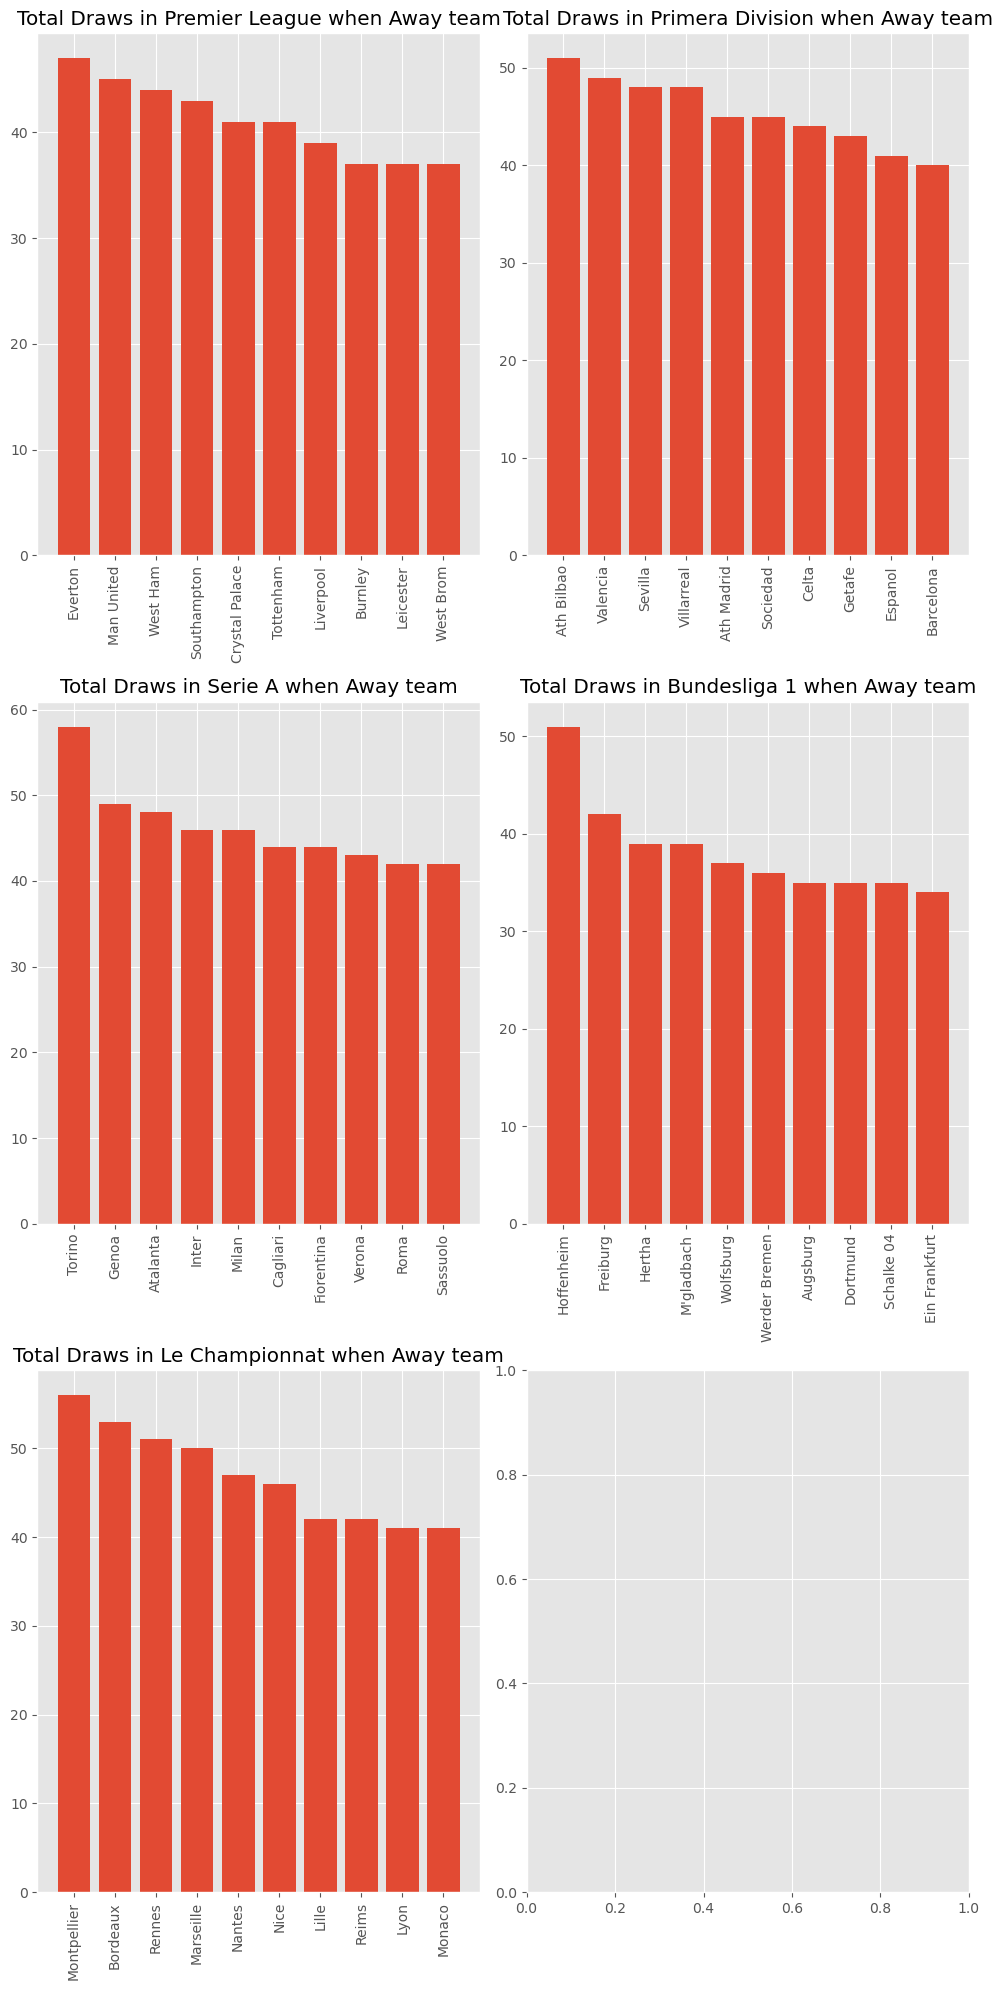

In [134]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'D'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Draws in {league} when Away team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

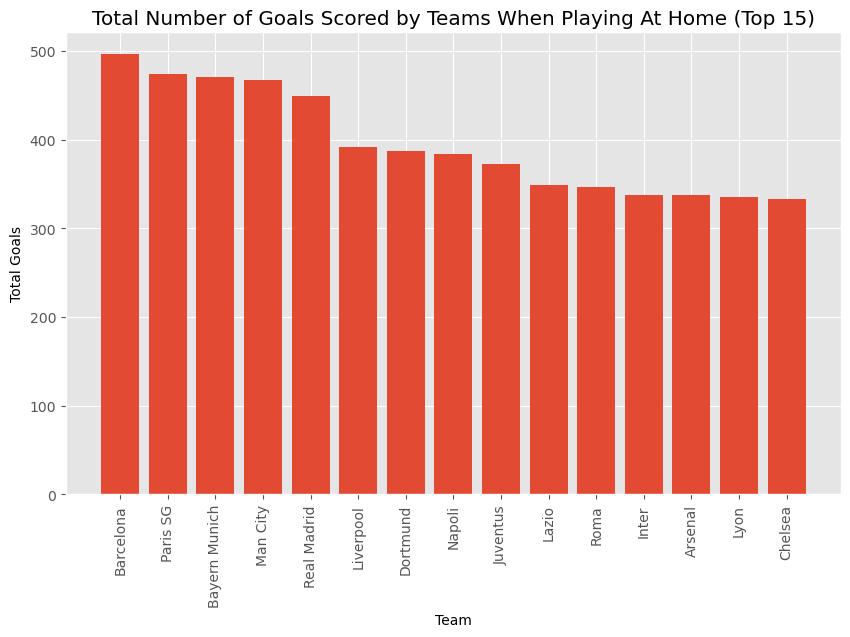

In [135]:
goals_df = clean_data.groupby('HomeTeam')['HomeScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='HomeScore', ascending=False)
top30_df = goals_df.head(15)

plt.figure(figsize=(10, 6))
plt.bar(top30_df['HomeTeam'], top30_df['HomeScore'])
plt.title('Total Number of Goals Scored by Teams When Playing At Home (Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [136]:
team_scores = clean_data.groupby('HomeTeam').agg({'HomeScore': 'sum'})
sorted_scores = team_scores.sort_values(by='HomeScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               HomeScore
HomeTeam                
Barcelona          496.0
Paris SG           474.0
Bayern Munich      470.0
Man City           467.0
Real Madrid        449.0
Liverpool          391.0
Dortmund           387.0
Napoli             384.0
Juventus           372.0
Lazio              349.0
Roma               347.0
Inter              338.0
Arsenal            338.0
Lyon               335.0
Chelsea            333.0


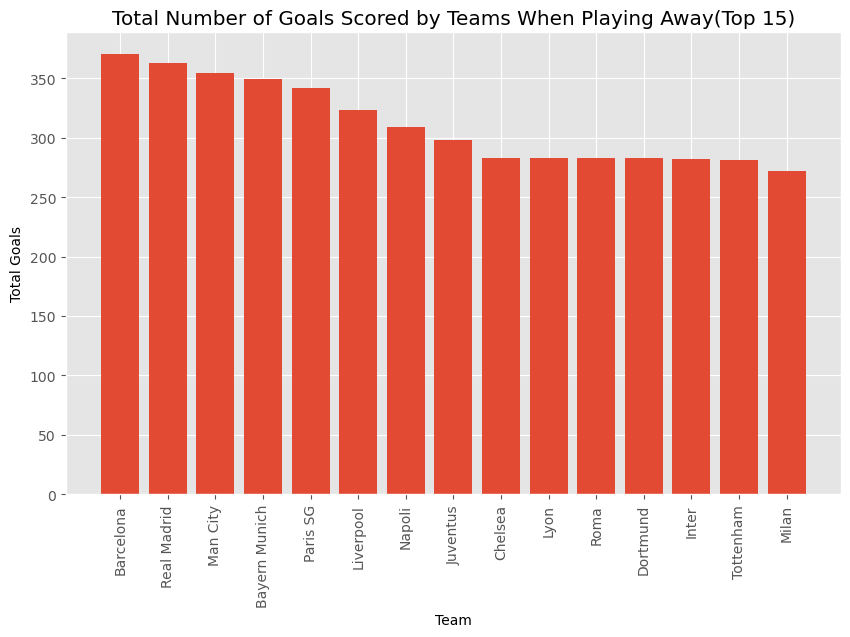

In [137]:
goals_df = data1.groupby('AwayTeam')['AwayScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='AwayScore', ascending=False)
top30_df = goals_df.head(15)


plt.figure(figsize=(10, 6))
plt.bar(top30_df['AwayTeam'], top30_df['AwayScore'])
plt.title('Total Number of Goals Scored by Teams When Playing Away(Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [138]:
team_scores = clean_data.groupby('AwayTeam').agg({'AwayScore': 'sum'})
sorted_scores = team_scores.sort_values(by='AwayScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               AwayScore
AwayTeam                
Barcelona          370.0
Real Madrid        363.0
Man City           354.0
Bayern Munich      349.0
Paris SG           342.0
Liverpool          323.0
Napoli             309.0
Juventus           298.0
Chelsea            283.0
Lyon               283.0
Roma               283.0
Dortmund           283.0
Inter              282.0
Tottenham          281.0
Milan              272.0


# Data Wrangling

Let's drop unnecessary categories. We don't need the `id` category since we wont be using that for modeling as well as the `Div` category as 5 of our leagues are the top flights in their respective countries and this info won't be necessary for modeling.

In [139]:
clean_data.id.nunique()

16332

In [140]:
clean_data = clean_data.drop('id', axis=1)

In [141]:
clean_data.Div.unique()

array(['E0', 'SP1', 'I1', 'D1', 'F1'], dtype=object)

In [142]:
clean_data = clean_data.drop('Div', axis=1)

In [143]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['Country', 'League', 'Season', 'HomeTeam', 'AwayTeam', 'Result',
       'HalfTimeResult'],
      dtype='object')


In [144]:
print(f"The countries in the dataset are: {clean_data.Country.unique()}")

print(f"The leagues in the dataset are: {clean_data.League.unique()}")

The countries in the dataset are: ['England' 'Spain' 'Italy' 'Germany' 'France']
The leagues in the dataset are: ['Premier League' 'Primera Division' 'Serie A' 'Bundesliga 1'
 'Le Championnat']


We can see that the Leagues and the Countries contain the same data, therefore we can drop the league since it conveys less general info.

In [145]:
clean_data = clean_data.drop('League', axis=1)

In [146]:
clean_data.to_csv('Euro Football Cleaner.csv', index=False)

## Extracting Date

Now let's extract the year, month, and day from the `Date` column. We will keep the `Date` for now for the feature engineering portion.

In [147]:
# extracting year
clean_data['Year'] = clean_data['Date'].dt.year

# extracting month
clean_data['Month'] = clean_data['Date'].dt.month
# extracting day
clean_data['Day'] = clean_data['Date'].dt.day

#dropping the date column
clean_data.drop('Date', axis=1, inplace=True)

# checking results
clean_data.head()

,Country,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Year,Month,Day
380,England,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,18.0,4.0,3.0,4.0,5.0,1.0,0.0,2013,8,17
381,England,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,11.0,12.0,6.0,1.0,1.0,0.0,0.0,2013,8,17
382,England,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,10.0,6.0,8.0,2.0,0.0,0.0,0.0,2013,8,17
383,England,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,14.0,6.0,1.0,0.0,3.0,0.0,0.0,2013,8,17
384,England,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,10.0,7.0,4.0,1.0,3.0,0.0,0.0,2013,8,17


In [148]:
clean_data[clean_data['Month'] == 7]

,Country,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Year,Month,Day
520,England,2013-2014,Crystal Palace,Cardiff,2.0,0.0,H,1.0,0.0,H,...,12.0,8.0,3.0,0.0,0.0,0.0,0.0,2013,7,12
521,England,2013-2014,Liverpool,West Ham,4.0,1.0,H,1.0,0.0,H,...,12.0,8.0,4.0,0.0,3.0,0.0,1.0,2013,7,12
522,England,2013-2014,Man United,Newcastle,0.0,1.0,A,0.0,0.0,D,...,18.0,4.0,4.0,0.0,2.0,0.0,0.0,2013,7,12
523,England,2013-2014,Southampton,Man City,1.0,1.0,D,1.0,1.0,D,...,9.0,5.0,4.0,0.0,2.0,0.0,0.0,2013,7,12
524,England,2013-2014,Stoke,Chelsea,3.0,2.0,H,1.0,1.0,D,...,8.0,5.0,2.0,4.0,1.0,0.0,0.0,2013,7,12
525,England,2013-2014,Sunderland,Tottenham,1.0,2.0,A,1.0,1.0,D,...,9.0,4.0,10.0,2.0,0.0,0.0,0.0,2013,7,12
526,England,2013-2014,West Brom,Norwich,0.0,2.0,A,0.0,1.0,A,...,6.0,10.0,3.0,1.0,3.0,0.0,0.0,2013,7,12
705,England,2013-2014,Tottenham,Sunderland,5.0,1.0,H,1.0,1.0,D,...,8.0,8.0,2.0,0.0,2.0,0.0,0.0,2014,7,4
748,England,2013-2014,Man City,Aston Villa,4.0,0.0,H,0.0,0.0,D,...,9.0,7.0,2.0,1.0,2.0,0.0,0.0,2014,7,5
749,England,2013-2014,Sunderland,West Brom,2.0,0.0,H,2.0,0.0,H,...,12.0,5.0,0.0,0.0,0.0,0.0,0.0,2014,7,5


## Creating Dummy Variables with `HomeTeam`

In [149]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
HomeTeams = pd.DataFrame(clean_data['HomeTeam'])
encoded = ohe.fit_transform(HomeTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#Adding "HomeTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["HomeTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping HomeTeam category
#clean_data = clean_data.drop(columns=['HomeTeam'])

## Creating Dummy Variables with `AwayTeam`

In [150]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
AwayTeams = pd.DataFrame(clean_data['AwayTeam'])
encoded = ohe.fit_transform(AwayTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "AwayTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["AwayTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping AwayTeam category
#clean_data = clean_data.drop(columns=['AwayTeam'])

## Creating Dummy Variables for `Season`

In [151]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Seasons = pd.DataFrame(clean_data['Season'])
encoded = ohe.fit_transform(Seasons)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Season_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Season_" + season for season in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping Season category
#clean_data = clean_data.drop(columns=['Season'])

## Creating Dummy Variables for `Country`

In [152]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Countries = pd.DataFrame(clean_data['Country'])
encoded = ohe.fit_transform(Countries)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Country_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Country_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping Country category
clean_data = clean_data.drop(columns=['Country'])

In [153]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['Season', 'HomeTeam', 'AwayTeam', 'Result', 'HalfTimeResult'], dtype='object')


In [154]:
clean_data.head()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2017-2018,Season_2018-2019,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,0,0,1,0,0,0,0
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,0,0,1,0,0,0,0
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,0,0,1,0,0,0,0
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,0,0,1,0,0,0,0
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,0,0,1,0,0,0,0


# Feature Engineering

## Creating `Form` Category

Let's create a couple of categories to signify the team's form, which will subtract the goals scored from goals conceded in the past 5 games. A team in good form will have a high positive value while a struggling team will have a negative value. This will allow our model to see which teams have been playing well or performing poorly in order to predict the current result.

We will do this by creating a function which calculates the scores from the past 5 games and updates them with the current match results. Since the form will only account for the last 5 matches, each team will start with 0. The form will be computed for both the home and away team in a dictionary, ensuring that each unique team has their own values. Afterwards, the rows will be run through the calculate_form function and two new categories will be created. Each unique team will have an ongoing form calculated whether they're playing at home or away.

In [155]:
def calculate_form(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_team_score = row['HomeScore'] - row['AwayScore']
    away_team_score = row['AwayScore'] - row['HomeScore']

    # Update the home_team_form_dict and away_team_form_dict with the current match result
    if home_team not in home_team_form_dict:
        home_team_form_dict[home_team] = [0] * 5
    home_team_form_dict[home_team].append(home_team_score)

    if away_team not in away_team_form_dict:
        away_team_form_dict[away_team] = [0] * 5
    away_team_form_dict[away_team].append(away_team_score)

    # Compute the home team form and away team form for the current match
    home_team_form = sum(home_team_form_dict[home_team][-5:])
    away_team_form = sum(away_team_form_dict[away_team][-5:])

    # If the team has played less than 2 match, set the form to 0
    if len(home_team_form_dict[home_team]) < 2:
        home_team_form = 0
    if len(away_team_form_dict[away_team]) < 2:
        away_team_form = 0

    return home_team_form, away_team_form

# Initialize the home_team_form_dict and away_team_form_dict with 0s for each team
home_team_form_dict = {team: [] for team in clean_data['HomeTeam'].unique()}
away_team_form_dict = {team: [] for team in clean_data['AwayTeam'].unique()}

# Create two new columns "HomeTeamForm" and "AwayTeamForm" containing the form for each team
clean_data[['HomeTeamForm', 'AwayTeamForm']] = clean_data.apply(lambda row: pd.Series(calculate_form(row)), axis=1)

Let's check to make sure the function has created the Form columns. They should be 0 when we show the head because the team's have yet to play any games, and return a positive and negative value when we call tail to show whether team's scored more goals than conceded or the reverse.

In [156]:
clean_data.head()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,1,0,0,0,0,0.0,0.0


In [157]:
clean_data.tail()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
16327,2021-2022,Lorient,Troyes,1.0,1.0,D,0.0,1.0,A,17.0,...,0,0,1,0,1,0,0,0,1.0,-2.0
16328,2021-2022,Marseille,Strasbourg,4.0,0.0,H,1.0,0.0,H,17.0,...,0,0,1,0,1,0,0,0,5.0,-4.0
16329,2021-2022,Nantes,St Etienne,1.0,1.0,D,1.0,0.0,H,12.0,...,0,0,1,0,1,0,0,0,2.0,-8.0
16330,2021-2022,Paris SG,Metz,5.0,0.0,H,3.0,0.0,H,27.0,...,0,0,1,0,1,0,0,0,10.0,-13.0
16331,2021-2022,Reims,Nice,2.0,3.0,A,2.0,0.0,H,5.0,...,0,0,1,0,1,0,0,0,-3.0,-3.0


Everything is working correctly and we see the form for each team for each row which should help us increase our prediction accuracy. Now let's run a basic Logistic Regression to see how well our dataset performs on the model.

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on validation set: 65.77%


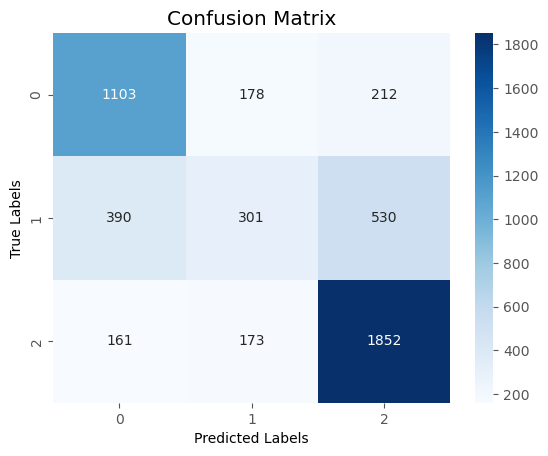

              precision    recall  f1-score   support

           A       0.67      0.74      0.70      1493
           D       0.46      0.25      0.32      1221
           H       0.71      0.85      0.77      2186

    accuracy                           0.66      4900
   macro avg       0.61      0.61      0.60      4900
weighted avg       0.64      0.66      0.64      4900



In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_test, y_pred))

## Creating `DrawsLast5` column

In [161]:
def calculate_draws(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['Result']
    
    # Update the home_team_draw_dict and away_team_draw_dict with the current match result
    if home_team not in home_team_draw_dict:
        home_team_draw_dict[home_team] = [0] * 3
    if result == "D":
        home_team_draw_dict[home_team].append(1)
    else:
        home_team_draw_dict[home_team].append(0)

    if away_team not in away_team_draw_dict:
        away_team_draw_dict[away_team] = [0] * 3
    if result == "D":
        away_team_draw_dict[away_team].append(1)
    else:
        away_team_draw_dict[away_team].append(0)

    # Compute the number of draws for the home team and away team in the last 3 matches, excluding the current match
    home_team_draws = sum(home_team_draw_dict[home_team][-4:-1])
    away_team_draws = sum(away_team_draw_dict[away_team][-4:-1])

    # If the team has played less than 2 matches, set the number of draws to 0
    if len(home_team_draw_dict[home_team]) < 2:
        home_team_draws = 0
    if len(away_team_draw_dict[away_team]) < 2:
        away_team_draws = 0

    return home_team_draws, away_team_draws

# Initialize the home_team_draw_dict and away_team_draw_dict with 0s for each team
home_team_draw_dict = {team: [] for team in clean_data['HomeTeam'].unique()}
away_team_draw_dict = {team: [] for team in clean_data['AwayTeam'].unique()}

# Create two new columns "HomeTeamDraws" and "AwayTeamDraws" containing the number of draws for each team
clean_data[['HomeTeamDrawsLast3', 'AwayTeamDrawsLast3']] = clean_data.apply(lambda row: pd.Series(calculate_draws(row)), axis=1)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on validation set: 64.64%


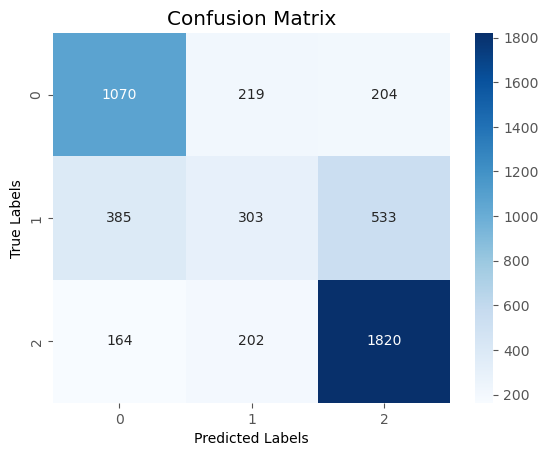

              precision    recall  f1-score   support

           A       0.66      0.72      0.69      1493
           D       0.42      0.25      0.31      1221
           H       0.71      0.83      0.77      2186

    accuracy                           0.65      4900
   macro avg       0.60      0.60      0.59      4900
weighted avg       0.62      0.65      0.63      4900



In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_test, y_pred))

After implementing the draws columns, our accuracy goes down by 1% as the model attempts to predict a lot of the Wins matches as Draws and ends up getting most of them wrong. The recall for both Home and Away wins goes down by 2% each while the draws remains at 25%. The correct amount of Draws only goes up by 2 results from 131 to 133, so we can discard these two columns since they are creating too many False Positives and False Negatives in our Home and Away wins.

In [166]:
#dropping DrawsLast3Columns
clean_data.drop(['HomeTeamDrawsLast3', 'AwayTeamDrawsLast3'], axis=1, inplace=True)

## Grouping Months into `PartsOfSeason`

Let's try making another feature where we will group the months into parts of a season. Most leagues start in August and conclude in May so we can split the season into "Beginning", "Middle", and "End". A lot of teams start the season strong and experience lull's in the middle and end so this feature can help our model recognize teams that are affected by seasonality and increase match accuracy prediction.

In [167]:
# creating season using lambda functions
clean_data['PartsOfSeason'] = clean_data['Month'].apply(lambda x: 'start' if x in [8, 9, 10]
                                           else ('middle' if x in [11, 12, 1, 2]
                                                 else ('end'))) 


# checking results
clean_data.value_counts('PartsOfSeason')


PartsOfSeason
middle    6105
end       5273
start     4954
dtype: int64

In [168]:
# import OHE
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
seasons = pd.DataFrame(clean_data['PartsOfSeason'])
encoded = ohe.fit_transform(seasons)

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

[array(['end', 'middle', 'start'], dtype=object)]

In [169]:
#renaming categories
categories = ['season_end', 'season_middle', 'season_start']

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

In [170]:
#dropping unneeded categories
clean_data = clean_data.drop(columns=['PartsOfSeason'])

In [171]:
clean_data

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm,season_end,season_middle,season_start
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,1,0,0,0,0,0.0,0.0,0,0,1
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,1,0,0,0,0,0.0,0.0,0,0,1
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,1,0,0,0,0,0.0,0.0,0,0,1
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,1,0,0,0,0,0.0,0.0,0,0,1
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,1,0,0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,2021-2022,Lorient,Troyes,1.0,1.0,D,0.0,1.0,A,17.0,...,0,1,0,0,0,1.0,-2.0,1,0,0
16328,2021-2022,Marseille,Strasbourg,4.0,0.0,H,1.0,0.0,H,17.0,...,0,1,0,0,0,5.0,-4.0,1,0,0
16329,2021-2022,Nantes,St Etienne,1.0,1.0,D,1.0,0.0,H,12.0,...,0,1,0,0,0,2.0,-8.0,1,0,0
16330,2021-2022,Paris SG,Metz,5.0,0.0,H,3.0,0.0,H,27.0,...,0,1,0,0,0,10.0,-13.0,1,0,0


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on validation set: 64.90%


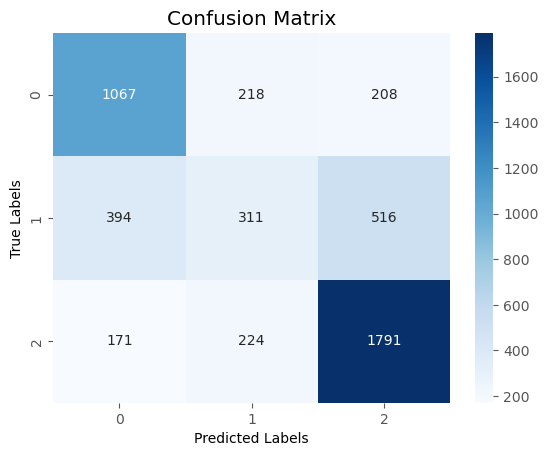

              precision    recall  f1-score   support

           A       0.65      0.71      0.68      1493
           D       0.41      0.25      0.32      1221
           H       0.71      0.82      0.76      2186

    accuracy                           0.65      4900
   macro avg       0.59      0.60      0.59      4900
weighted avg       0.62      0.65      0.63      4900



In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_test, y_pred))

These columns seem to have lowered our overall accuracy, despite slightly raising the number of correct draws. However, lets revert to where we were since our Home and Away Recall goes down by 3 points.

In [175]:
#dropping Seasons columns
clean_data.drop(['season_end', 'season_middle', 'season_start'], axis=1, inplace=True)

Now that we completed our Feature Engineering, let's delete the categories that we used to develop our features.

In [179]:
clean_data.head()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,1,0,0,0,0,0.0,0.0


In [180]:
#dropping categories
clean_data = clean_data.drop(columns=['Season', "HomeTeam", "AwayTeam"])

We now have a dataset that we can start modelling on. In the next part, we will build a pipe utilizing Scalers, PCM, and various parameters to fit a Logistic Regression, SVM, and XGBoost models on our data and achieve the best prediction accuracy.

In [181]:
clean_data.to_csv('Euro_Football_For_Modelling.csv', index=False)